- 手書き数字データセットMNISTを使用。
- 画像を千切りにして時系列データとして学習する。
- MNISTは28x28ピクセルなので、長さ28のスペクトルが28個あるものとして扱う。
- リカレントニューラルネット（Recurrent Neural Networks; RNN）の一種であるLSTM（Long Short-Term Memory）を使う。
    - LSTMは入力されたデータを覚えたり忘れたりする機構がある。時系列データを学習するときによく使う。

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np

x_train = x_train / 255.
x_test = x_test / 255.
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

- 28本の千切りデータを入力するので、特徴量の次元は28次元。
- 長さは28とわかっているが、あえてわかっていないことにしておく（不定長ベクトルとして扱う）。
- LSTMへの入力shapeは(バッチ, シークエンス長, 特徴ベクトルの次元)とする。
- `return_sequences`のオプションでシークエンスを返すか最後の出力だけを返すかを決められる。
    - LSTMは時系列データを受け取っているので、受け取ったデータと同じ長さのデータを返すことができる。その場合はこのオプションをTrueにする。
    - 一方で、最新の出力だけを知りたい場合もあるので、その場合はこのオプションをFalseにする。

In [4]:
from keras.layers import Input, LSTM, Dense

x = Input(shape=(None, 28)) # (シークエンス長, 特徴量の次元)

h = LSTM(
    units=50, # 隠れ層の次元は50次元とする。
    activation='tanh',
    recurrent_activation='hard_sigmoid',
    unit_forget_bias=True,
    return_sequences=False, # ここをTrueにすると、長さNone（=28）の50次元ベクトルが返ってくる。
    return_state=False,
)(x)

y = Dense(10, activation='softmax')(h)

In [5]:
from keras.models import Model

model = Model(x,y)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 28)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                15800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 16,310
Trainable params: 16,310
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist=model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 137s - loss: 0.5137 - acc: 0.8378 - val_loss: 0.1864 - val_acc: 0.9457
Epoch 2/10
54000/54000 [==============================] - 136s - loss: 0.1690 - acc: 0.9489 - val_loss: 0.1156 - val_acc: 0.9675
Epoch 3/10
54000/54000 [==============================] - 134s - loss: 0.1164 - acc: 0.9651 - val_loss: 0.0921 - val_acc: 0.9753
Epoch 4/10
54000/54000 [==============================] - 137s - loss: 0.0934 - acc: 0.9721 - val_loss: 0.0912 - val_acc: 0.9725
Epoch 5/10
54000/54000 [==============================] - 137s - loss: 0.0752 - acc: 0.9775 - val_loss: 0.0637 - val_acc: 0.9818
Epoch 6/10
54000/54000 [==============================] - 136s - loss: 0.0648 - acc: 0.9802 - val_loss: 0.0657 - val_acc: 0.9828
Epoch 7/10
54000/54000 [==============================] - 136s - loss: 0.0551 - acc: 0.9831 - val_loss: 0.0668 - val_acc: 0.9790
Epoch 8/10
54000/54000 [========================

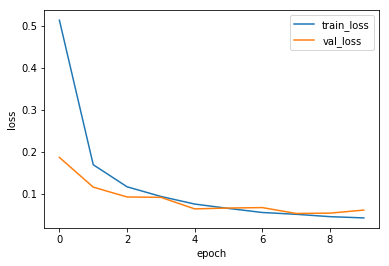

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.epoch, hist.history['loss'], label='train_loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

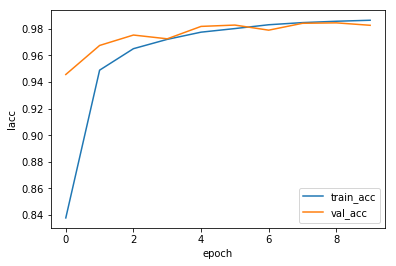

In [8]:
plt.plot(hist.epoch, hist.history['acc'], label='train_acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('lacc')

In [9]:
model.evaluate(x=x_test, y=y_test)

 9984/10000 [============================>.] - ETA: 0s

[0.069593206756375731, 0.98129999999999995]